In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 16]
import seaborn as sns

In [3]:
urls_base="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"
files=("time_series_covid19_deaths_global.csv",
       "time_series_covid19_confirmed_global.csv",
       "time_series_covid19_recovered_global.csv")

In [4]:
import pathlib

from subprocess import run
from itertools import chain
import pathlib

for filename in files:
    url= urls_base+filename
    run(chain(
    ('curl', '-s', url),
    ('-o', str(filename)),
    ('-z', str(filename)) if pathlib.Path(filename).exists() else (),))

In [5]:
import pandas as pd

In [6]:
def read_data(filename, varname):
    df= cases= pd.read_csv(filename, usecols= lambda x : x not in ('Lat', 'Long'))
    df= pd.melt(df, id_vars = df.columns[:2], value_vars= df.columns[2:]) 
    df = df.groupby(['Country/Region', 'variable']).sum().reset_index()
    df= df.rename(columns={'variable':'Date', 'value':varname})
    df['Date']= pd.to_datetime(df['Date'])
    return df

In [7]:
covid=read_data(files[0], "Deaths").merge(read_data(files[1], "Cases")).merge(read_data(files[2], "Recoveries"))
covid

,Country/Region,Date,Deaths,Cases,Recoveries
0,Afghanistan,2021-01-01,2191,51526,41727
1,Afghanistan,2021-01-10,2277,53489,43948
2,Afghanistan,2021-01-11,2288,53538,44137
3,Afghanistan,2021-01-12,2301,53584,44608
4,Afghanistan,2021-01-13,2301,53584,44850
...,...,...,...,...,...
80251,Zimbabwe,2020-09-05,206,6837,5345
80252,Zimbabwe,2020-09-06,206,6837,5345
80253,Zimbabwe,2020-09-07,210,7298,5455
80254,Zimbabwe,2020-09-08,218,7388,5477


In [209]:
#!echo "Y"|conda install -c conda-forge country_converter

/bin/bash: line 1: conda: command not found


In [8]:
import country_converter as coco

In [ ]:
covid['ISO3']=coco.convert(names=list(covid['Country/Region']),to='ISO3');

World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex
World not found in regex


In [10]:
coco.convert("Eswatini")

'SWZ'

In [11]:
covid=covid[covid['ISO3'] != 'not found']

In [12]:
world=covid.groupby('Date').sum().reset_index()
world['Country/Region']='World'
world['ISO3']='' # ???
world

,Date,Deaths,Cases,Recoveries,Country/Region,ISO3
0,2020-01-22,17,557,30,World,
1,2020-01-23,18,655,32,World,
2,2020-01-24,26,941,39,World,
3,2020-01-25,42,1433,42,World,
4,2020-01-26,56,2118,56,World,
...,...,...,...,...,...,...
413,2021-03-10,2620062,118093927,66855799,World,
414,2021-03-11,2629817,118570753,67128415,World,
415,2021-03-12,2639434,119059762,67396970,World,
416,2021-03-13,2648147,119514331,67649571,World,


Selection d'un intervalle de temps :

In [13]:
selected_day = pd.Timestamp("2021-03-01")
one_week_before = selected_day - pd.Timedelta("6 days") # 6 parce que la borne finale sera incluse !!!
covid.set_index('ISO3').loc['FRA'].set_index('Date').sort_index().loc[one_week_before:selected_day]

,Country/Region,Deaths,Cases,Recoveries
Date,,,,
2021-02-23,France,85195,3689534,258863
2021-02-24,France,85473,3721061,260230
2021-02-25,France,85734,3746475,261648
2021-02-26,France,86273,3771691,261649
2021-02-27,France,86458,3795687,261649
2021-02-28,France,86580,3815639,261649
2021-03-01,France,86955,3820369,265165


passage cumul → variations journalières :

In [14]:
world.iloc[:,1:4].diff()

,Deaths,Cases,Recoveries
0,NaN,NaN,NaN
1,1.0,98.0,2.0
2,8.0,286.0,7.0
3,16.0,492.0,3.0
4,14.0,685.0,14.0
...,...,...,...
413,9672.0,467098.0,235354.0
414,9755.0,476826.0,272616.0
415,9617.0,489009.0,268555.0
416,8713.0,454569.0,252601.0


In [15]:
covid=covid.append(world)

On peux utiliser un multi-index :

In [16]:
covid= covid.set_index(['ISO3', 'Date'])

In [17]:
covid=covid.sort_index()

In [18]:
covid = covid.reset_index()

In [19]:
covid.index

RangeIndex(start=0, stop=79838, step=1)

In [20]:
tmp=covid.set_index('ISO3').loc['FRA'].reset_index().set_index('Date').loc['2021-02'].iloc[:,-3:].diff().reset_index().melt(id_vars=['Date'],
                                                                                                                       value_vars=['Deaths','Cases','Recoveries'])

In [21]:
tmp

,Date,variable,value
0,2021-02-01,Deaths,NaN
1,2021-02-02,Deaths,726.0
2,2021-02-03,Deaths,358.0
3,2021-02-04,Deaths,0.0
4,2021-02-05,Deaths,1008.0
...,...,...,...
79,2021-02-24,Recoveries,1367.0
80,2021-02-25,Recoveries,1418.0
81,2021-02-26,Recoveries,1.0
82,2021-02-27,Recoveries,0.0


In [22]:
plt.rcParams['figure.figsize'] = [16, 8]

<AxesSubplot:xlabel='Date', ylabel='value'>

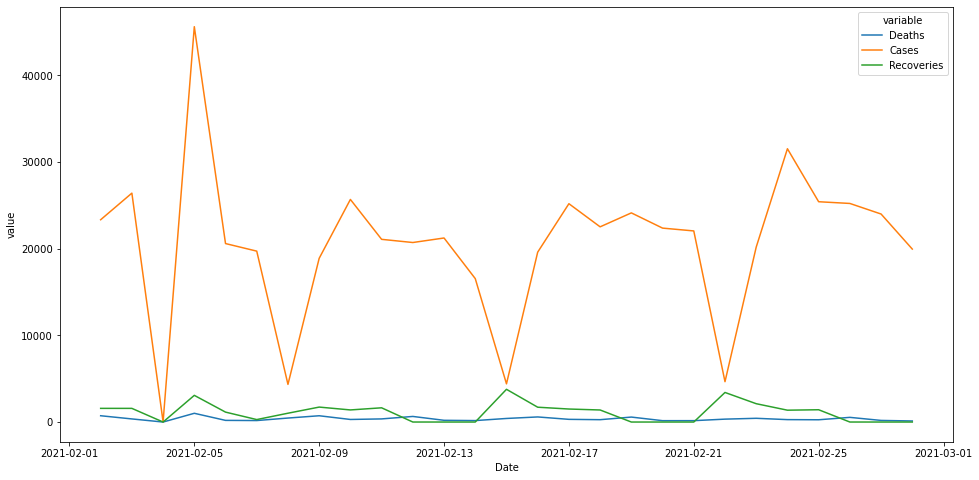

In [23]:
sns.lineplot(data=tmp, x='Date', y='value', hue='variable')

In [24]:
covid

,ISO3,Date,Country/Region,Deaths,Cases,Recoveries
0,,2020-01-22,World,17,557,30
1,,2020-01-23,World,18,655,32
2,,2020-01-24,World,26,941,39
3,,2020-01-25,World,42,1433,42
4,,2020-01-26,World,56,2118,56
...,...,...,...,...,...,...
79833,ZWE,2021-03-10,Zimbabwe,1489,36341,33953
79834,ZWE,2021-03-11,Zimbabwe,1492,36377,33972
79835,ZWE,2021-03-12,Zimbabwe,1496,36423,33996
79836,ZWE,2021-03-13,Zimbabwe,1501,36471,34011


Pour les moyennes glissantes, utiliser `rolling` :

In [25]:
tmp=pd.concat([covid,covid.rolling(7).mean().rename(columns={'Deaths':'Deaths(week avg)',
                                                                     'Cases': 'Cases(week avg)',
                                                                     'Recoveries':'Recoveries(week avg)'})], axis=1)

In [26]:
tmp.set_index('ISO3').loc['FRA'].reset_index().set_index('Date').loc['2021-02'].iloc[:,-6:].diff()

,Deaths,Cases,Recoveries,Deaths(week avg),Cases(week avg),Recoveries(week avg)
Date,,,,,,
2021-02-01,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-02,726.0,23337.0,1577.0,447.571429,20735.285714,1119.285714
2021-02-03,358.0,26406.0,1576.0,448.714286,20657.428571,1141.857143
2021-02-04,0.0,20.0,0.0,399.571429,17238.000000,1129.428571
2021-02-05,1008.0,45607.0,3077.0,426.285714,20434.000000,1160.142857
2021-02-06,191.0,20588.0,1144.0,419.142857,19940.142857,1224.714286
2021-02-07,171.0,19715.0,284.0,415.714286,20008.714286,1224.428571
2021-02-08,460.0,4343.0,1017.0,416.285714,20002.285714,1239.285714
2021-02-09,724.0,18886.0,1724.0,416.000000,19366.428571,1260.285714


In [27]:
tmp

,ISO3,Date,Country/Region,Deaths,Cases,Recoveries,Deaths(week avg),Cases(week avg),Recoveries(week avg)
0,,2020-01-22,World,17,557,30,NaN,NaN,NaN
1,,2020-01-23,World,18,655,32,NaN,NaN,NaN
2,,2020-01-24,World,26,941,39,NaN,NaN,NaN
3,,2020-01-25,World,42,1433,42,NaN,NaN,NaN
4,,2020-01-26,World,56,2118,56,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
79833,ZWE,2021-03-10,Zimbabwe,1489,36341,33953,1486.000000,36279.000000,33824.857143
79834,ZWE,2021-03-11,Zimbabwe,1492,36377,33972,1487.285714,36301.000000,33873.428571
79835,ZWE,2021-03-12,Zimbabwe,1496,36423,33996,1489.000000,36326.000000,33907.285714
79836,ZWE,2021-03-13,Zimbabwe,1501,36471,34011,1491.285714,36356.142857,33936.714286


In [28]:
tmp=tmp.set_index('ISO3').loc['FRA'].reset_index().set_index('Date').loc['2020-10-01':'2021'].iloc[:,-6:].diff().reset_index().melt(id_vars=['Date'],
                                                                                                                          value_vars=['Deaths','Cases','Recoveries','Deaths(week avg)', 'Cases(week avg)','Recoveries(week avg)'])


(0.0, 113699.35)

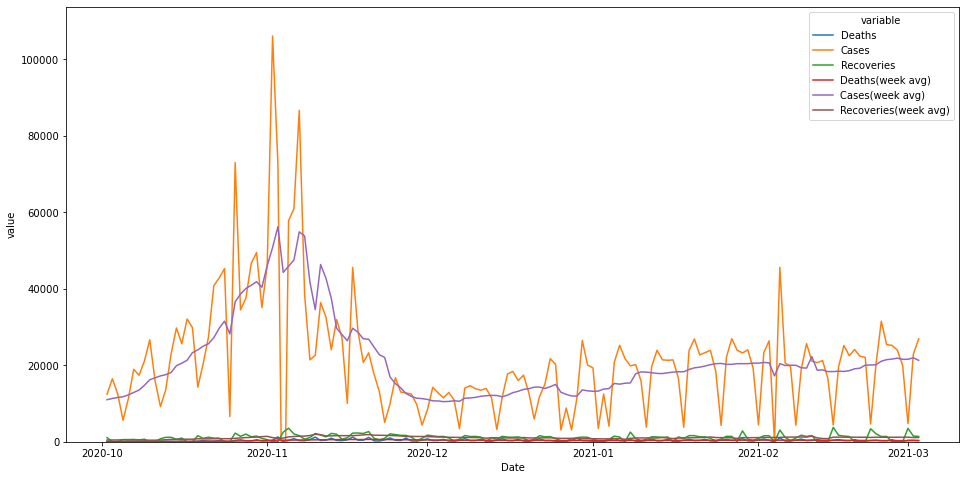

In [30]:
sns.lineplot(data=tmp, x='Date', y='value', hue='variable').set_ylim(0,None)

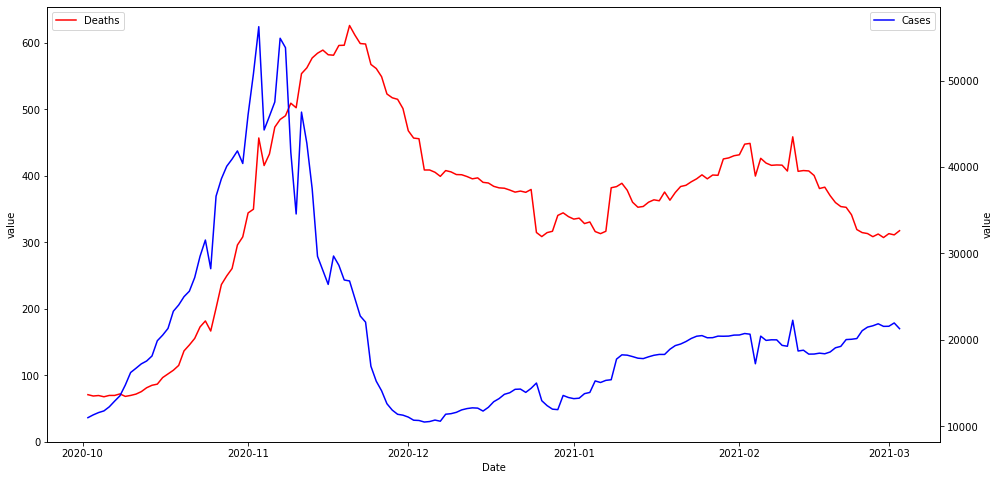

In [31]:
ax=sns.lineplot(data=tmp[tmp['variable']=='Deaths(week avg)'], x='Date', y='value', color='r', legend=False)
ax.set_ylim(0,None)
ax2 = plt.twinx()
sns.lineplot(data=tmp[tmp['variable']=='Cases(week avg)'], x='Date', y='value', color='b', ax=ax2)
ax.legend(['Deaths'], loc='upper left')
ax2.legend(['Cases'], loc='upper right');

In [37]:
covid.loc[('FRA',slice(pd.to_datetime('2021-02-20'),'2021-02-24'))]

KeyError: Timestamp('2021-02-20 00:00:00')

In [2]:
final = pd.read_csv("final.csv", header=0, sep=",")

In [3]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75411 entries, 0 to 75410
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            75411 non-null  object
 1   Country/Region  75411 non-null  object
 2   death_Value     75411 non-null  int64 
 3   conf_Value      75411 non-null  int64 
 4   reco_Value      75411 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.9+ MB


In [4]:
final['Date']

0        2020-01-21T23:00:00.000Z
1        2020-01-22T23:00:00.000Z
2        2020-01-23T23:00:00.000Z
3        2020-01-24T23:00:00.000Z
4        2020-01-25T23:00:00.000Z
                   ...           
75406    2021-02-18T23:00:00.000Z
75407    2021-02-19T23:00:00.000Z
75408    2021-02-20T23:00:00.000Z
75409    2021-02-21T23:00:00.000Z
75410    2021-02-22T23:00:00.000Z
Name: Date, Length: 75411, dtype: object

In [5]:
final['Date'].str.slice(0,10)

0        2020-01-21
1        2020-01-22
2        2020-01-23
3        2020-01-24
4        2020-01-25
            ...    
75406    2021-02-18
75407    2021-02-19
75408    2021-02-20
75409    2021-02-21
75410    2021-02-22
Name: Date, Length: 75411, dtype: object

In [6]:
pd.to_datetime(final['Date'].str.slice(0,10))
#pd permet de transformer la date objet en date

0       2020-01-21
1       2020-01-22
2       2020-01-23
3       2020-01-24
4       2020-01-25
           ...    
75406   2021-02-18
75407   2021-02-19
75408   2021-02-20
75409   2021-02-21
75410   2021-02-22
Name: Date, Length: 75411, dtype: datetime64[ns]

In [7]:
final['Date']

0        2020-01-21T23:00:00.000Z
1        2020-01-22T23:00:00.000Z
2        2020-01-23T23:00:00.000Z
3        2020-01-24T23:00:00.000Z
4        2020-01-25T23:00:00.000Z
                   ...           
75406    2021-02-18T23:00:00.000Z
75407    2021-02-19T23:00:00.000Z
75408    2021-02-20T23:00:00.000Z
75409    2021-02-21T23:00:00.000Z
75410    2021-02-22T23:00:00.000Z
Name: Date, Length: 75411, dtype: object

In [8]:
final['Date']= pd.to_datetime(final['Date'].str.slice(0,10))
final
#le T a disparu et on verifie avecinfo pour etre sur.

,Date,Country/Region,death_Value,conf_Value,reco_Value
0,2020-01-21,Afghanistan,0,0,0
1,2020-01-22,Afghanistan,0,0,0
2,2020-01-23,Afghanistan,0,0,0
3,2020-01-24,Afghanistan,0,0,0
4,2020-01-25,Afghanistan,0,0,0
...,...,...,...,...,...
75406,2021-02-18,World,2450768,110576706,62186592
75407,2021-02-19,World,2459273,110946373,62455216
75408,2021-02-20,World,2465148,111258746,62671826
75409,2021-02-21,World,2472177,111546199,62853778


In [9]:
final.set_index('Date').tz_localize(None)

,Country/Region,death_Value,conf_Value,reco_Value
Date,,,,
2020-01-21,Afghanistan,0,0,0
2020-01-22,Afghanistan,0,0,0
2020-01-23,Afghanistan,0,0,0
2020-01-24,Afghanistan,0,0,0
2020-01-25,Afghanistan,0,0,0
...,...,...,...,...
2021-02-18,World,2450768,110576706,62186592
2021-02-19,World,2459273,110946373,62455216
2021-02-20,World,2465148,111258746,62671826


In [10]:
final['Date']

0       2020-01-21
1       2020-01-22
2       2020-01-23
3       2020-01-24
4       2020-01-25
           ...    
75406   2021-02-18
75407   2021-02-19
75408   2021-02-20
75409   2021-02-21
75410   2021-02-22
Name: Date, Length: 75411, dtype: datetime64[ns]

In [11]:
final['Date']=final['Date'].dt.tz_localize(None)

In [12]:
final.info() #permet de verifier qua date et bien en datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75411 entries, 0 to 75410
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            75411 non-null  datetime64[ns]
 1   Country/Region  75411 non-null  object        
 2   death_Value     75411 non-null  int64         
 3   conf_Value      75411 non-null  int64         
 4   reco_Value      75411 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.9+ MB


In [13]:
final.set_index('Date')#permet de basculer en index

,Country/Region,death_Value,conf_Value,reco_Value
Date,,,,
2020-01-21,Afghanistan,0,0,0
2020-01-22,Afghanistan,0,0,0
2020-01-23,Afghanistan,0,0,0
2020-01-24,Afghanistan,0,0,0
2020-01-25,Afghanistan,0,0,0
...,...,...,...,...
2021-02-18,World,2450768,110576706,62186592
2021-02-19,World,2459273,110946373,62455216
2021-02-20,World,2465148,111258746,62671826


In [14]:
final= final.set_index('Date')#si tu rexecutes plusieurs normal qu'il y a erreur verfication ci dessous

In [15]:
final.loc['2021-01']#toutes les ignes du mois de janvier

,Country/Region,death_Value,conf_Value,reco_Value
Date,,,,
2021-01-01,Afghanistan,2191,51526,41727
2021-01-02,Afghanistan,2191,51526,41727
2021-01-03,Afghanistan,2237,53011,42530
2021-01-04,Afghanistan,2244,53105,42666
2021-01-05,Afghanistan,2244,53105,42666
...,...,...,...,...
2021-01-27,World,2196567,101322223,55926705
2021-01-28,World,2211442,101911352,56290292
2021-01-29,World,2224948,102425832,56641015


In [16]:
final.loc['2021-01-01']#toutes les dates de ce jour

,Country/Region,death_Value,conf_Value,reco_Value
Date,,,,
2021-01-01,Afghanistan,2191,51526,41727
2021-01-01,Albania,1190,58991,34353
2021-01-01,Algeria,2769,100159,67611
2021-01-01,Andorra,84,8166,7463
2021-01-01,Angola,407,17608,11189
...,...,...,...,...
2021-01-01,Vietnam,35,1482,1337
2021-01-01,Yemen,610,2101,1396
2021-01-01,Zambia,392,21230,18942


In [17]:
final.reset_index()# pour retrouver mon index et un champ date

,Date,Country/Region,death_Value,conf_Value,reco_Value
0,2020-01-21,Afghanistan,0,0,0
1,2020-01-22,Afghanistan,0,0,0
2,2020-01-23,Afghanistan,0,0,0
3,2020-01-24,Afghanistan,0,0,0
4,2020-01-25,Afghanistan,0,0,0
...,...,...,...,...,...
75406,2021-02-18,World,2450768,110576706,62186592
75407,2021-02-19,World,2459273,110946373,62455216
75408,2021-02-20,World,2465148,111258746,62671826
75409,2021-02-21,World,2472177,111546199,62853778


In [18]:
final.loc['2021-01-01']#toutes les dates de ce jour

,Country/Region,death_Value,conf_Value,reco_Value
Date,,,,
2021-01-01,Afghanistan,2191,51526,41727
2021-01-01,Albania,1190,58991,34353
2021-01-01,Algeria,2769,100159,67611
2021-01-01,Andorra,84,8166,7463
2021-01-01,Angola,407,17608,11189
...,...,...,...,...
2021-01-01,Vietnam,35,1482,1337
2021-01-01,Yemen,610,2101,1396
2021-01-01,Zambia,392,21230,18942


In [19]:
final.loc['2021-01']#toutes les dates de ce mois

,Country/Region,death_Value,conf_Value,reco_Value
Date,,,,
2021-01-01,Afghanistan,2191,51526,41727
2021-01-02,Afghanistan,2191,51526,41727
2021-01-03,Afghanistan,2237,53011,42530
2021-01-04,Afghanistan,2244,53105,42666
2021-01-05,Afghanistan,2244,53105,42666
...,...,...,...,...
2021-01-27,World,2196567,101322223,55926705
2021-01-28,World,2211442,101911352,56290292
2021-01-29,World,2224948,102425832,56641015


In [20]:
final =final.reset_index()

In [21]:
final

,Date,Country/Region,death_Value,conf_Value,reco_Value
0,2020-01-21,Afghanistan,0,0,0
1,2020-01-22,Afghanistan,0,0,0
2,2020-01-23,Afghanistan,0,0,0
3,2020-01-24,Afghanistan,0,0,0
4,2020-01-25,Afghanistan,0,0,0
...,...,...,...,...,...
75406,2021-02-18,World,2450768,110576706,62186592
75407,2021-02-19,World,2459273,110946373,62455216
75408,2021-02-20,World,2465148,111258746,62671826
75409,2021-02-21,World,2472177,111546199,62853778


In [22]:
final= final.set_index(['Date','Country/Region'])

In [23]:
final

,,death_Value,conf_Value,reco_Value
Date,Country/Region,,,
2020-01-21,Afghanistan,0,0,0
2020-01-22,Afghanistan,0,0,0
2020-01-23,Afghanistan,0,0,0
2020-01-24,Afghanistan,0,0,0
2020-01-25,Afghanistan,0,0,0
...,...,...,...,...
2021-02-18,World,2450768,110576706,62186592
2021-02-19,World,2459273,110946373,62455216
2021-02-20,World,2465148,111258746,62671826


In [24]:
final =final.reset_index()

In [25]:
final= final.set_index(['Date','Country/Region'])

In [26]:
final

,,death_Value,conf_Value,reco_Value
Date,Country/Region,,,
2020-01-21,Afghanistan,0,0,0
2020-01-22,Afghanistan,0,0,0
2020-01-23,Afghanistan,0,0,0
2020-01-24,Afghanistan,0,0,0
2020-01-25,Afghanistan,0,0,0
...,...,...,...,...
2021-02-18,World,2450768,110576706,62186592
2021-02-19,World,2459273,110946373,62455216
2021-02-20,World,2465148,111258746,62671826


In [27]:
final = final.sort_index() #pour trier l'index

In [28]:
final

death_Value  conf_Value  reco_Value
Date       Country/Region                                     
2020-01-21 Afghanistan               0           0           0
           Albania                   0           0           0
           Algeria                   0           0           0
           Andorra                   0           0           0
           Angola                    0           0           0
...                                ...         ...         ...
2021-02-22 Vietnam                  35        2403        1760
           World               2483425   111932655    63131676
           Yemen                   620        2187        1432
           Zambia                 1040       75582       69436
           Zimbabwe               1448       35910       32288

[75411 rows x 3 columns]

In [29]:
final.loc[('2020-01-21','Afghanistan')]

death_Value    0
conf_Value     0
reco_Value     0
Name: (2020-01-21 00:00:00, Afghanistan), dtype: int64

In [30]:
final.loc[('2020-01-21','World')]

death_Value     17
conf_Value     557
reco_Value      30
Name: (2020-01-21 00:00:00, World), dtype: int64